In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
import statsmodels.api as sm

price = pd.read_table('pricelist.csv',delimiter =';')
combi = pd.read_table('Historical_combi2.csv',delimiter =';')
I_2011 = pd.read_table('WTI_2012.csv',delimiter =';')

combi=combi.fillna(0)

In [5]:
I_2011

,Pred Year,Pred brent 2012,Pred FO 1% 2012,Pred FO 3.5% 2012,Pred Butane 2012,Pred VGO 0.5% 2012,TD 2012,Actual 2012
0,2006,35.0,-5.90,-10.90,-5.78,0.58,0.33,-17.5
1,2007,35.0,-5.90,-10.90,-5.78,0.58,0.33,-17.5
2,2008,82.5,-13.65,-22.31,-23.87,0.87,0.75,-17.5
3,2009,63.0,-10.86,-16.14,-16.06,0.02,0.51,-17.5
4,2010,85.0,-7.44,-12.90,-21.83,0.99,0.59,-17.5
5,2011,110.0,-4.09,-10.13,-24.07,8.28,0.56,-17.5


In [6]:
X = combi[['Dated Brent','Butane','VGO 0.5%']]
Y = combi['WTI']
regr = linear_model.LinearRegression()
regr.fit(X, Y)
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

DB= I_2011["Pred brent 2012"]
Bu= I_2011["Pred Butane 2012"]
VGO05= I_2011["Pred VGO 0.5% 2012"]
linear_WTI=regr.intercept_+ regr.coef_[0]*DB + regr.coef_[1]*Bu + regr.coef_[2]*VGO05
print(linear_WTI)

Intercept: 
 4.42565753993971
Coefficients: 
 [-0.11994083 -0.05832338 -0.60368246]
                            OLS Regression Results                            
Dep. Variable:                    WTI   R-squared:                       0.447
Model:                            OLS   Adj. R-squared:                  0.440
Method:                 Least Squares   F-statistic:                     62.47
Date:                Tue, 17 Sep 2019   Prob (F-statistic):           1.21e-29
Time:                        14:49:15   Log-Likelihood:                -691.04
No. Observations:                 236   AIC:                             1390.
Df Residuals:                     232   BIC:                             1404.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------

/srv/conda/envs/notebook/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [7]:
nonlinear_WTI = -15.142388486653 - 2.06420352656404*Bu - 0.00877784990583735*DB*VGO05 - 0.000867998048676867*np.power(Bu,3) - 0.0803378779475392*np.power(Bu,2)
print(nonlinear_WTI)


0   -5.905832
1   -5.905832
2   -0.469275
3    0.872093
4   -0.074571
5   -7.892317
dtype: float64


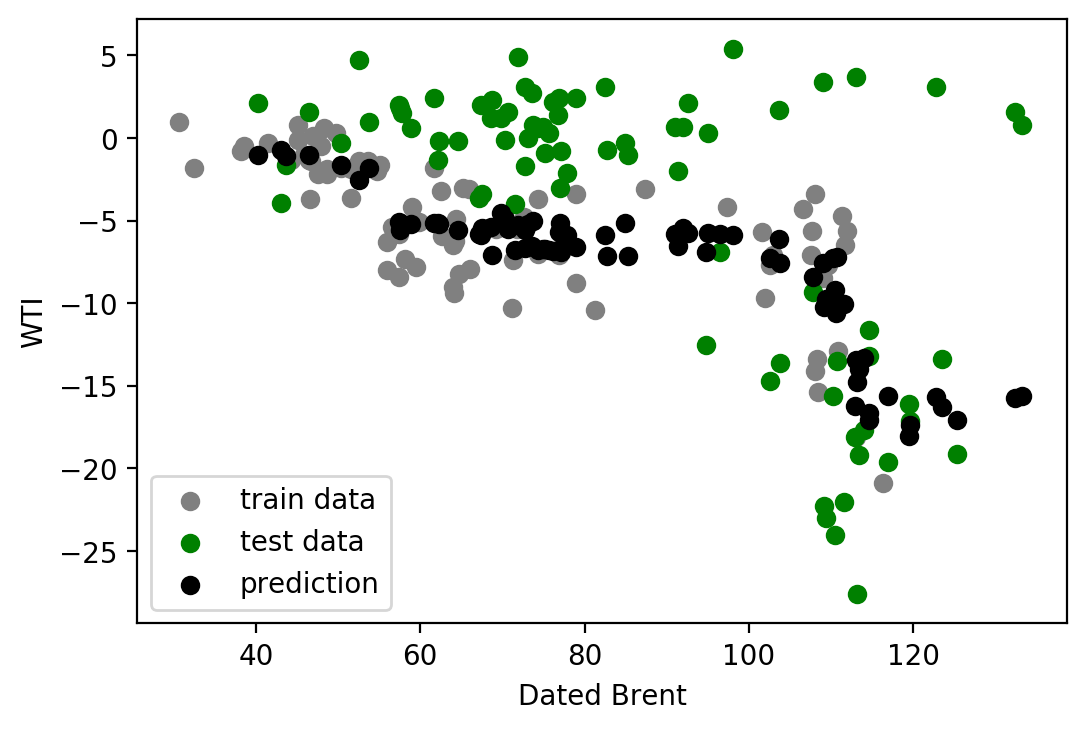

Mean squared error: 2.29
Feature ranking:
Feature Dated Brent (0.820070)
Feature Butane (0.090403)
Feature VGO 0.5% (0.089527)


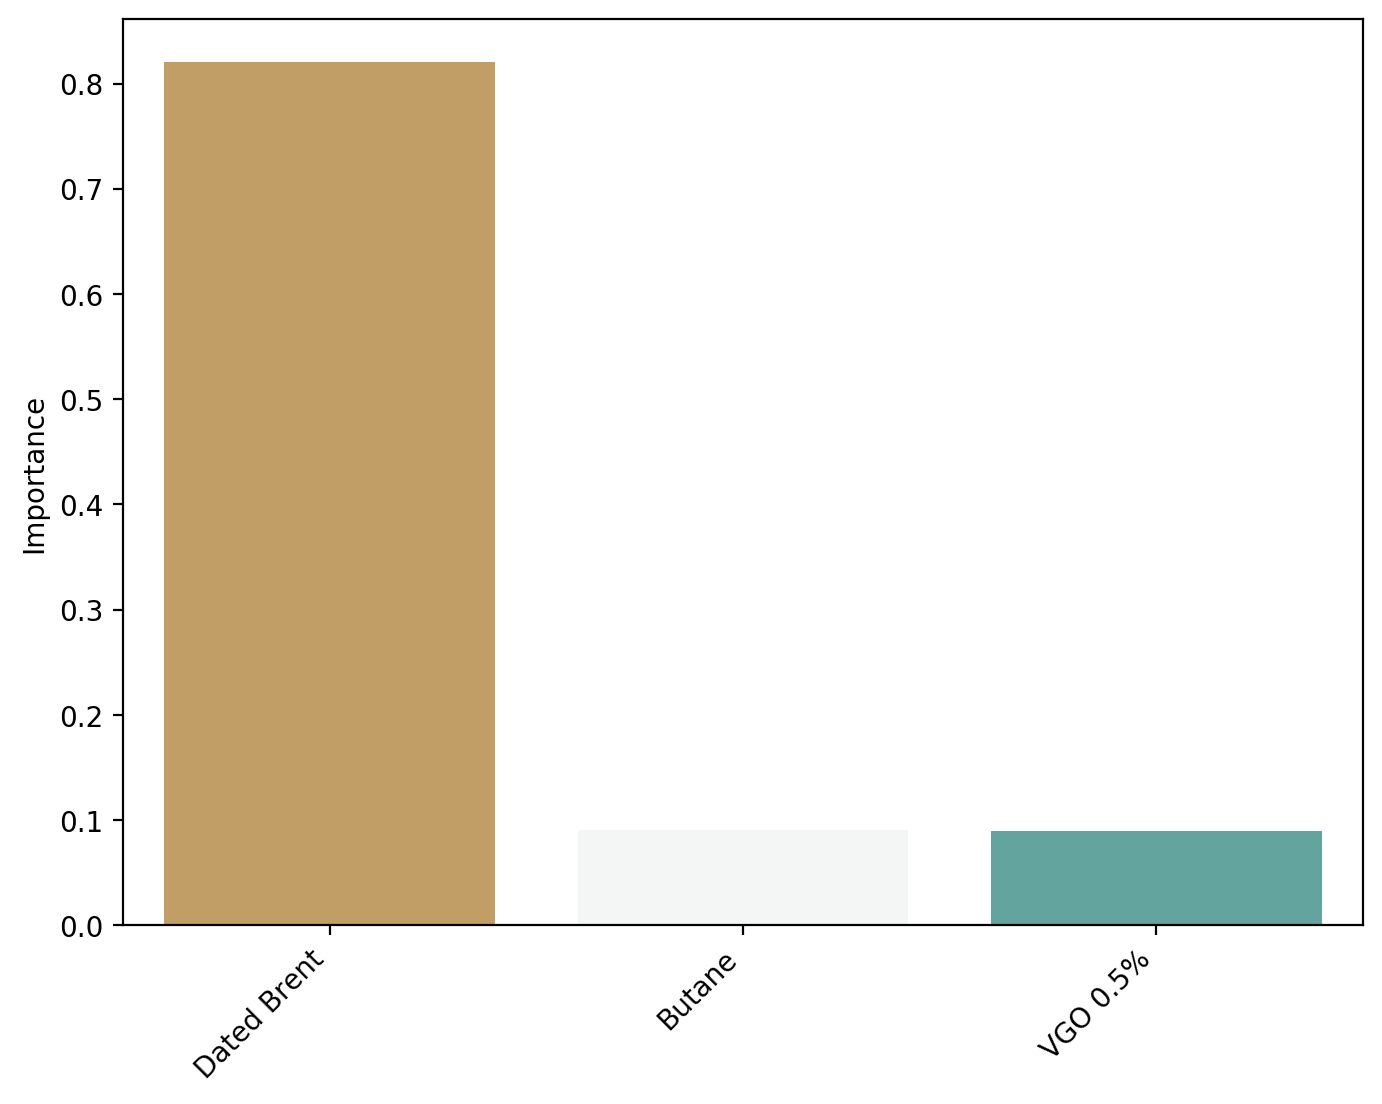

In [8]:
train_combi = combi.iloc[156:,1:]
test_combi = combi.iloc[75:155,1:]

plt.rcParams['figure.dpi'] = 200

#x_train=train_combi.drop("Maya Europe",axis=1)
#x_train=train_combi[train_combi.columns.difference(["Mars"])]
x_train=train_combi[["Dated Brent","Butane", "VGO 0.5%"]]
y_train=train_combi["WTI"]

#df.drop('b', axis=1)

#x_test=train_combi.drop("Maya Europe",axis=1)
#x_test=test_combi[test_combi.columns.difference(["Mars"])]
x_test=test_combi[["Dated Brent","Butane", "VGO 0.5%"]]
y_test=test_combi["WTI"].to_frame()



regressor = RandomForestRegressor(n_estimators=200, max_depth=5)

clf=regressor.fit(x_train, y_train)

y_pred=regressor.predict(x_test)
y_pred=pd.DataFrame(y_pred)


plt_train=plt.scatter(x_train["Dated Brent"],y_train,   color='grey')
plt_test=plt.scatter(x_test["Dated Brent"],y_test,   color='green')
plt_pred=plt.scatter(x_test["Dated Brent"], y_pred,  color='black')



plt.xlabel("Dated Brent")
plt.ylabel("WTI")
plt.legend((plt_train, plt_test,plt_pred),("train data", "test data","prediction"))
plt.show()

print("Mean squared error: %.2f"
      % np.mean((regressor.predict(x_train) - y_train) ** 2))

import seaborn as sns
importances=regressor.feature_importances_

indices=list(x_train)
print("Feature ranking:")

for f in range(x_train.shape[1]):
    print("Feature %s (%f)" % (indices[f], importances[f]))

f, (ax1) = plt.subplots(1, 1, figsize=(8, 6), sharex=True)
sns.barplot(indices, importances, palette="BrBG", ax=ax1)
ax1.set_ylabel("Importance")

ax1.set_xticklabels(
    ax1.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);




In [9]:
#data_df = price[['Dated brent','Butane','VGO 0.5%']]
data_df = pd.concat([DB, Bu,VGO05],axis=1)
y_pred=regressor.predict(data_df)
y_pred= pd.DataFrame(y_pred)
print(y_pred)

           0
0  -0.696641
1  -0.696641
2  -6.239043
3  -5.268215
4  -6.195376
5 -11.477348


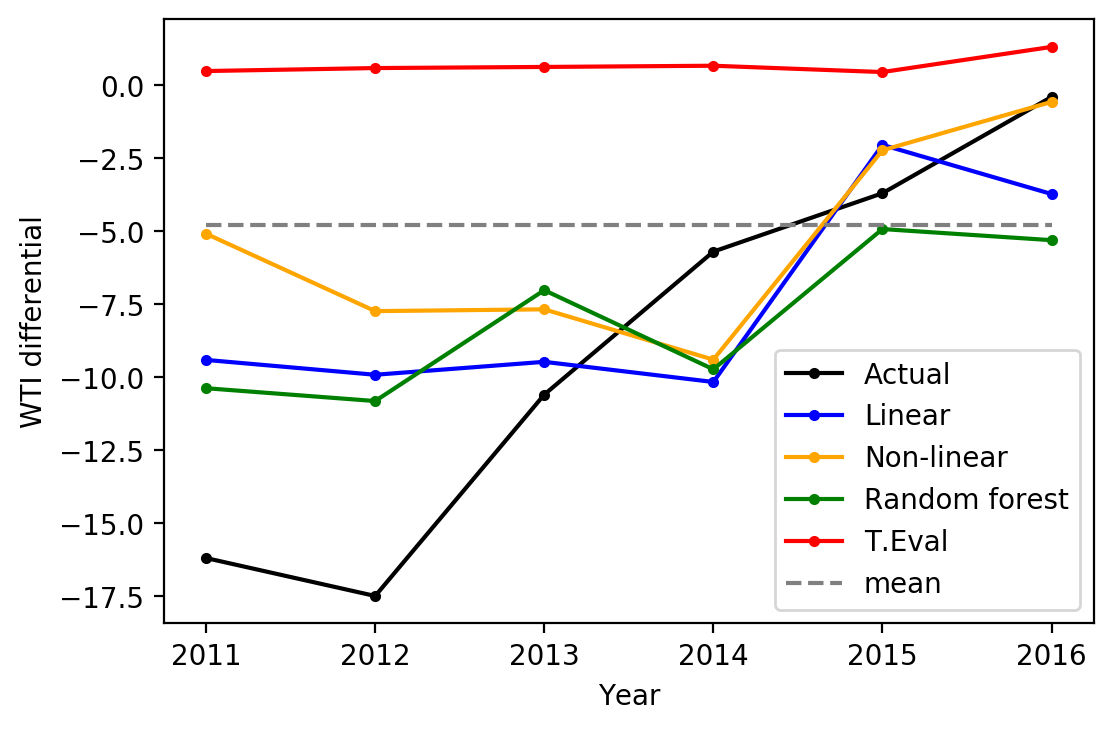

In [8]:
plt.plot(price["Year"],price["Actual WTI"],'k.-')
plt.plot(price["Year"],linear_WTI,'b.-')
plt.plot(price["Year"],nonlinear_WTI,'.-',color ='orange')
plt.plot(price["Year"],y_pred,'g.-')
plt.plot(price["Year"],price["TE WTI"],'r.-')
plt.plot([price["Year"].iloc[0],price["Year"].iloc[-1]],[-4.8,-4.8],'--',color='grey')
plt.xlabel('Year')
plt.ylabel('WTI differential')
plt.legend(("Actual","Linear","Non-linear","Random forest","T.Eval","mean"))

In [21]:
price.drop(["Actual Dubai","TE Dubai"],axis=1)

,Year,Dated brent,Butane,VGO 0.5%,Jet Oil,Gasoil,FO 1%,FO 3.5%,Actual WTI,TE WTI
0,2011,112,-29.0,3.47,16.92,13.98,-10.86,-16.83,-16.2,0.487255
1,2012,110,-32.0,5.00,17.00,15.00,-4.00,-11.00,-17.5,0.589180
2,2013,107,-32.4,4.90,19.70,17.10,-5.50,-12.10,-10.6,0.627577
3,2014,108,-34.0,6.00,15.00,14.00,-9.00,-19.00,-5.7,0.668985
4,2015,63,-29.0,1.00,19.00,16.00,-12.00,-16.00,-3.7,0.452248
5,2016,65,-14.6,2.00,12.50,10.50,-10.50,-14.50,-0.4,1.314382


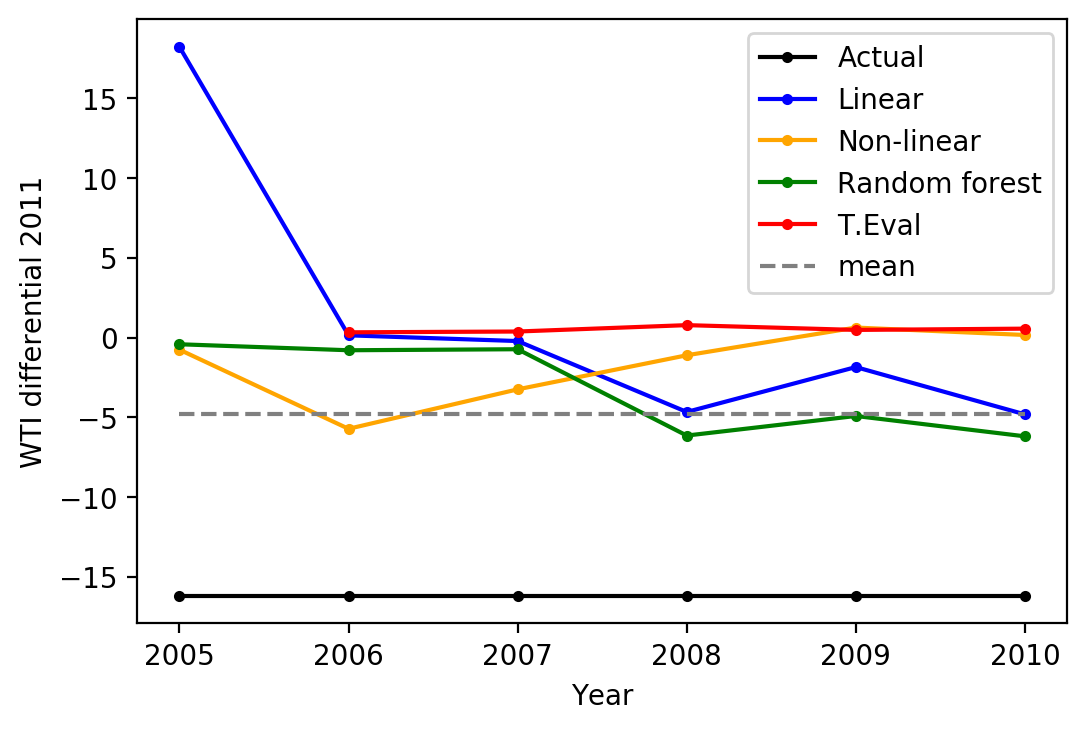

In [11]:
plt.plot(I_2011["Pred Year"],I_2011["Actual 2011"],'k.-')
plt.plot(I_2011["Pred Year"],linear_WTI,'b.-')
plt.plot(I_2011["Pred Year"],nonlinear_WTI,'.-',color ='orange')
plt.plot(I_2011["Pred Year"],y_pred,'g.-')
plt.plot(I_2011["Pred Year"],I_2011["TD 2011"],'r.-')
plt.plot([I_2011["Pred Year"].iloc[0],I_2011["Pred Year"].iloc[-1]],[-4.79,-4.79],'--',color='grey')
plt.xlabel('Year')
plt.ylabel('WTI differential 2011')
plt.legend(("Actual","Linear","Non-linear","Random forest","T.Eval","mean"))

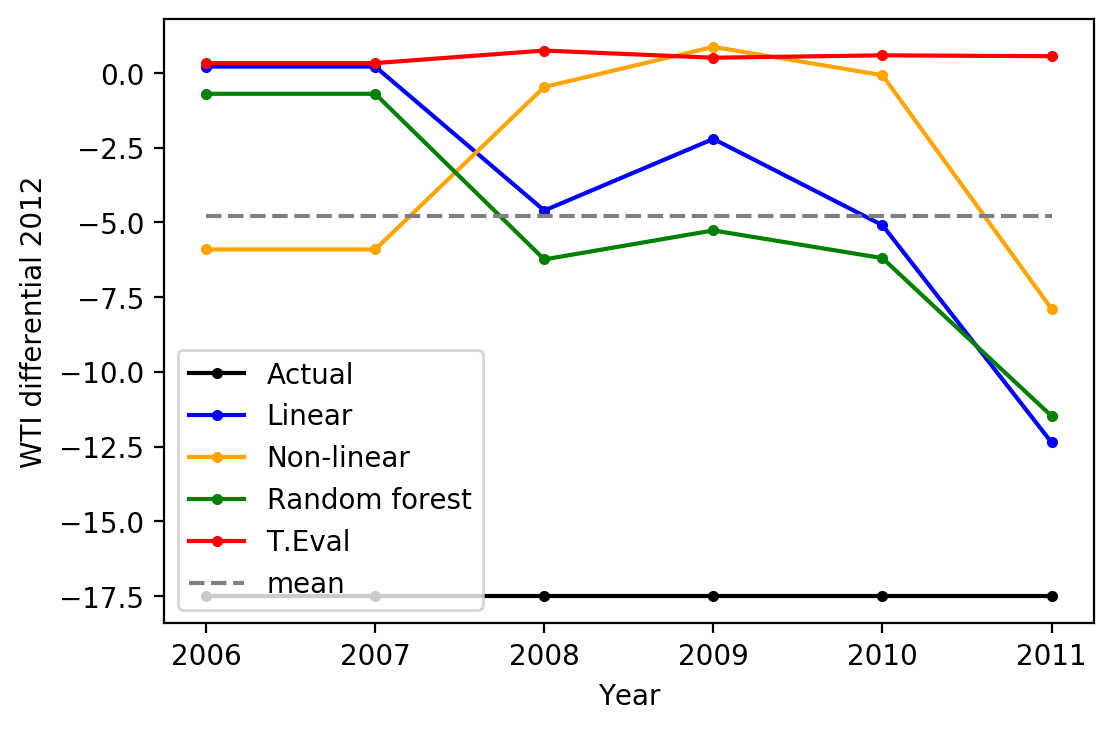

In [10]:
plt.plot(I_2011["Pred Year"],I_2011["Actual 2012"],'k.-')
plt.plot(I_2011["Pred Year"],linear_WTI,'b.-')
plt.plot(I_2011["Pred Year"],nonlinear_WTI,'.-',color ='orange')
plt.plot(I_2011["Pred Year"],y_pred,'g.-')
plt.plot(I_2011["Pred Year"],I_2011["TD 2012"],'r.-')
plt.plot([I_2011["Pred Year"].iloc[0],I_2011["Pred Year"].iloc[-1]],[-4.79,-4.79],'--',color='grey')
plt.xlabel('Year')
plt.ylabel('WTI differential 2012')
plt.legend(("Actual","Linear","Non-linear","Random forest","T.Eval","mean"))